In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# REFER TO data/README.md
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Skirt", "Sneaker", "Bag", "Ankle boot"]

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.2845 - accuracy: 0.6780
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7145 - accuracy: 0.7206
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6293 - accuracy: 0.7503
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5906 - accuracy: 0.7732
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5690 - accuracy: 0.7828
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5570 - accuracy: 0.7940
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5255 - accuracy: 0.8113
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5029 - accuracy: 0.8256
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4962 - accuracy: 0.8277
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.492

In [11]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [12]:
print(predictions[0])
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}%\n(Correct label: {})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

[1.8245521e-17 5.2725866e-12 0.0000000e+00 6.6321487e-13 0.0000000e+00
 8.8005759e-02 3.1024109e-26 1.0006769e-01 4.3983171e-08 8.1192660e-01]


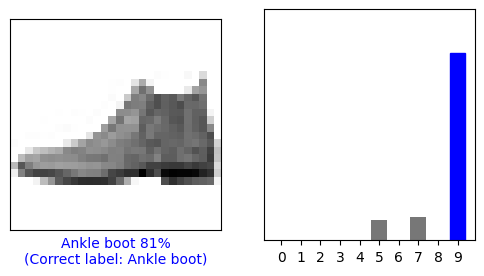

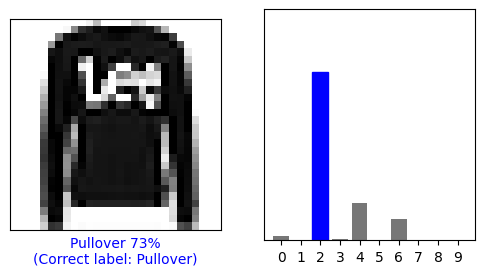

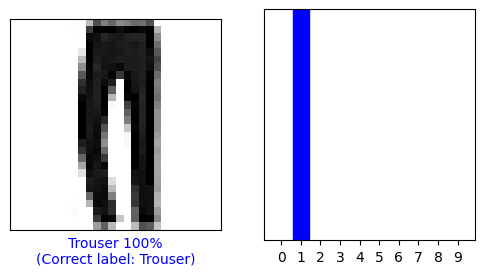

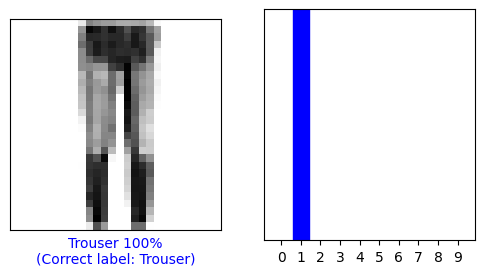

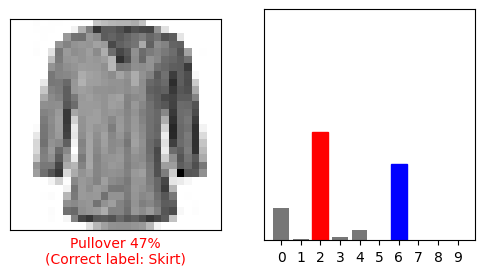

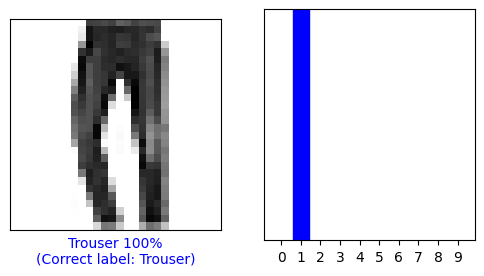

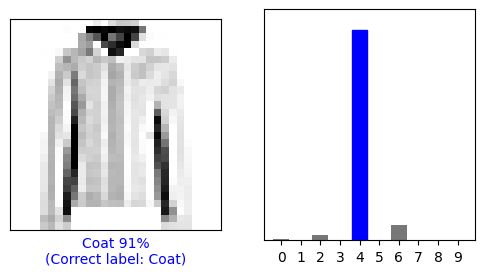

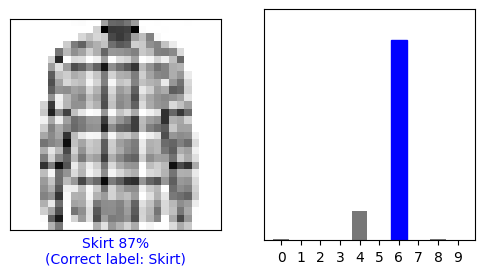

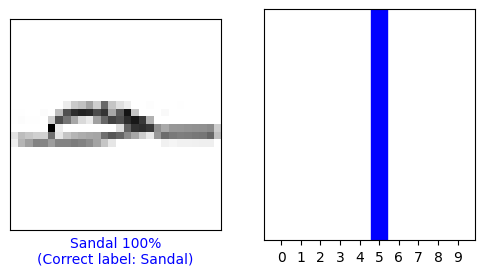

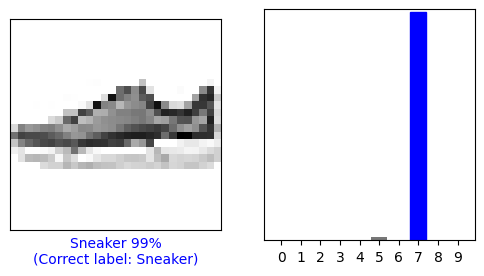

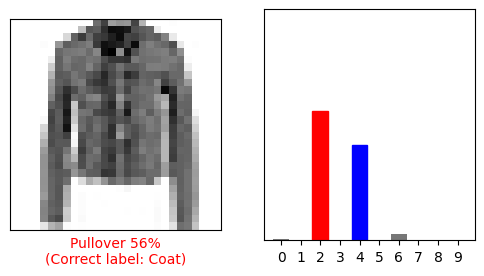

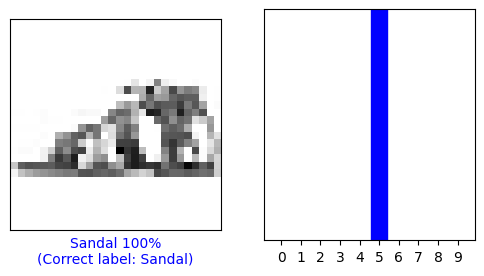

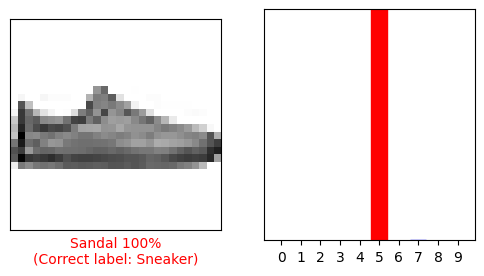

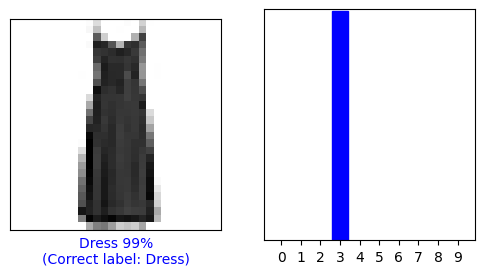

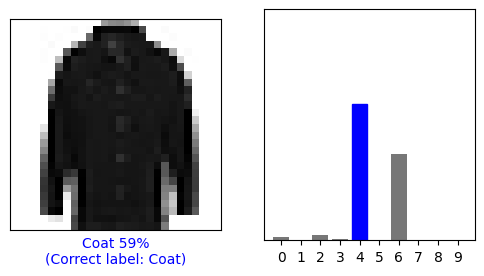

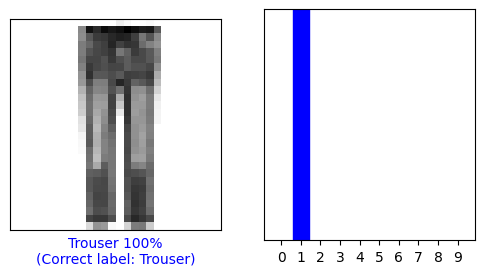

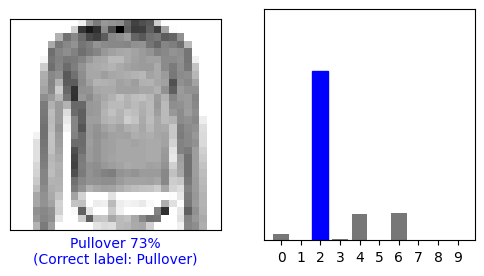

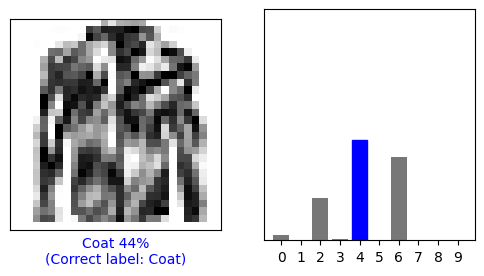

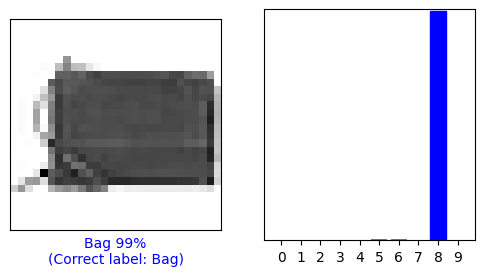

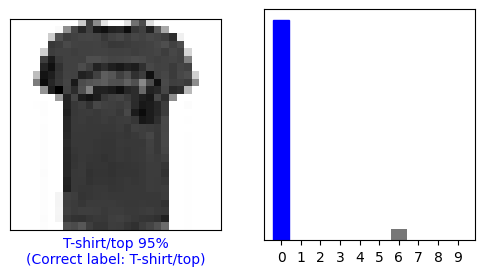

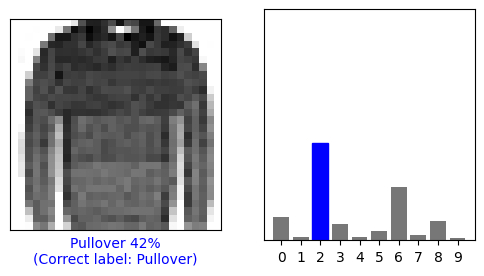

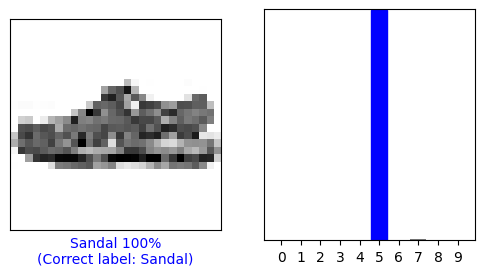

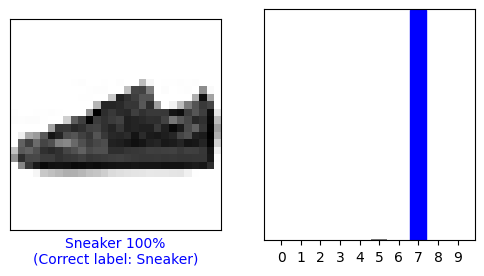

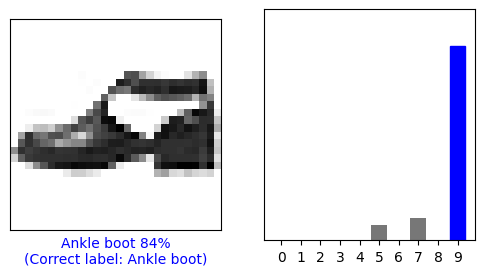

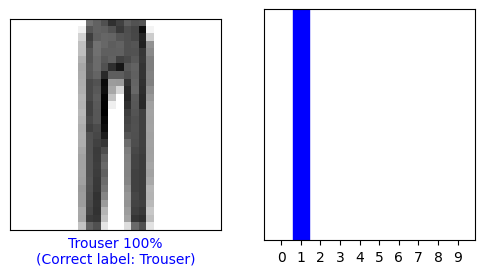

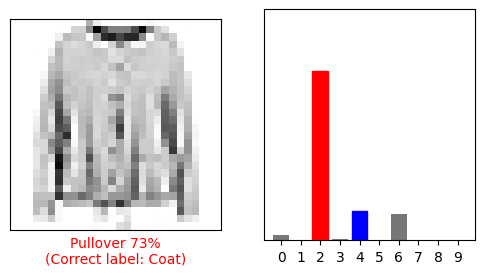

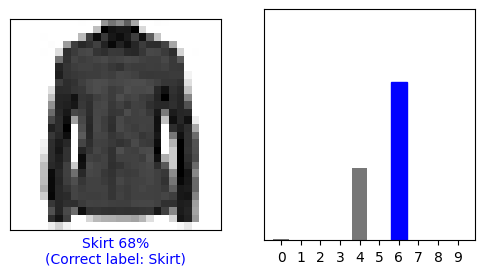

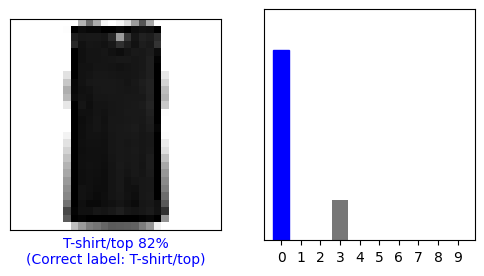

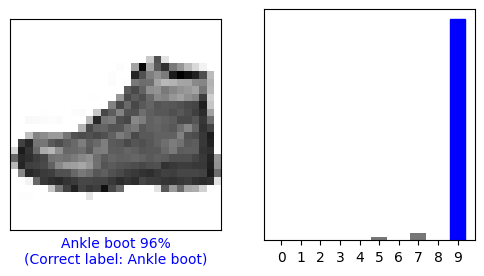

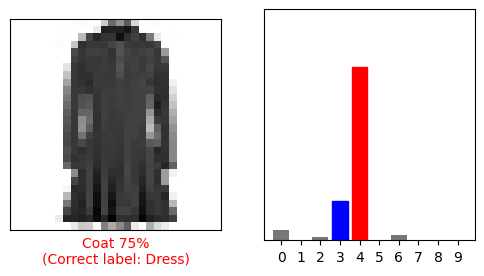

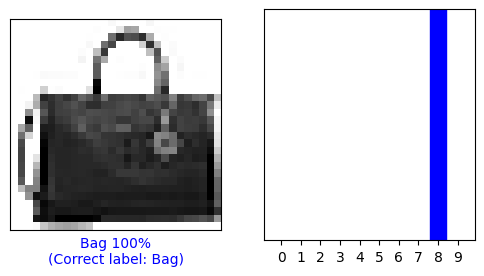

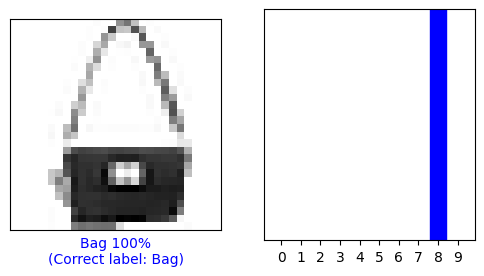

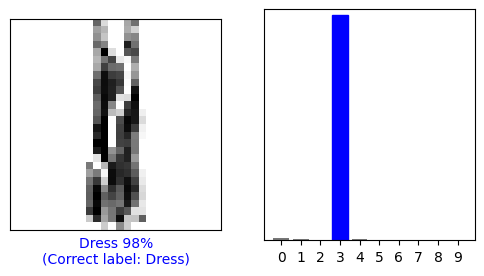

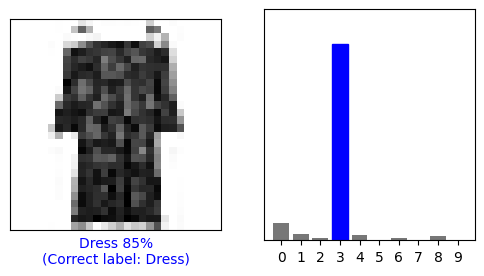

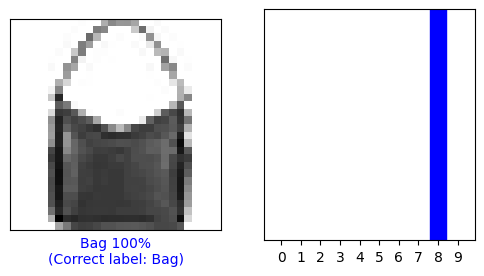

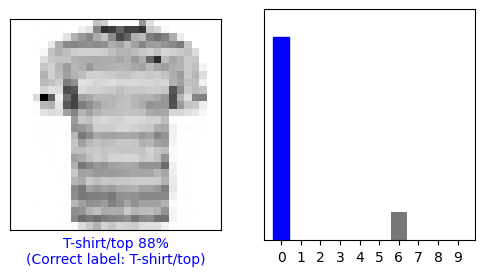

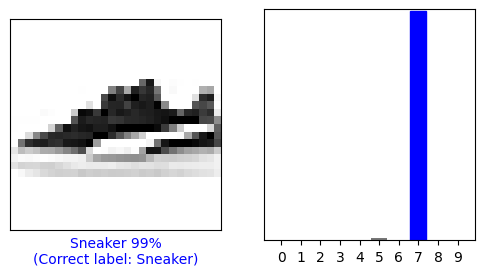

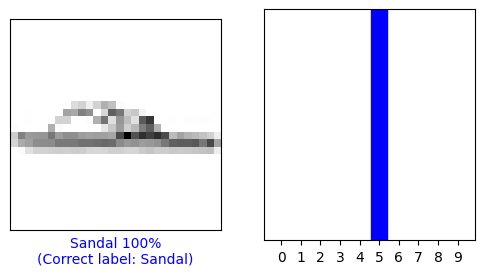

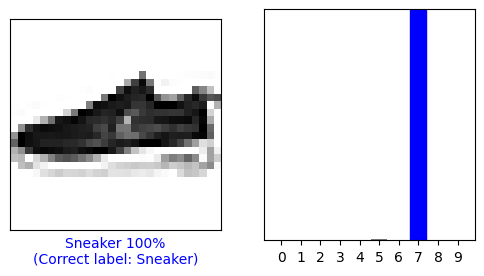

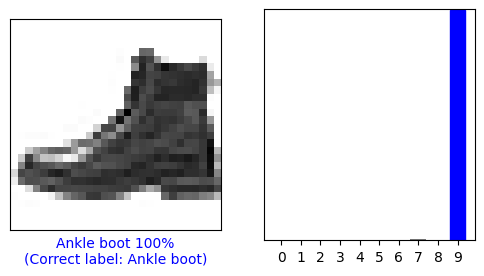

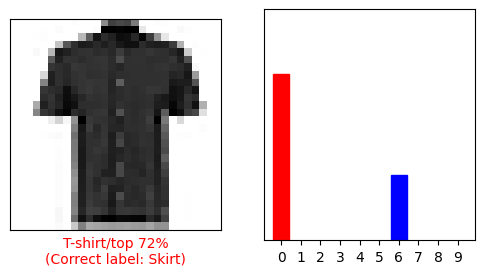

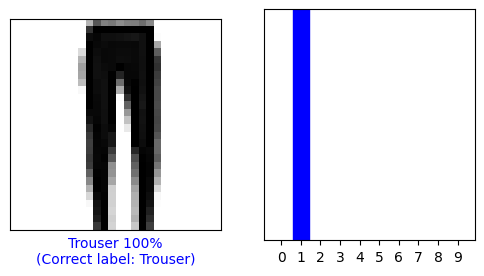

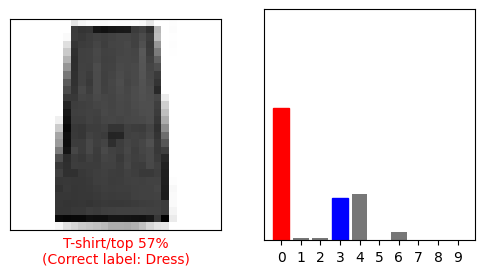

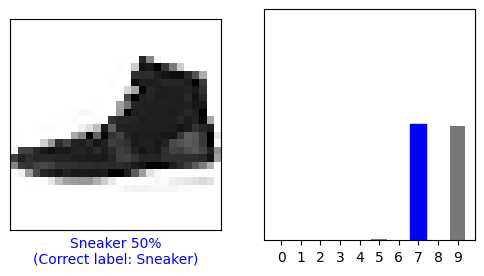

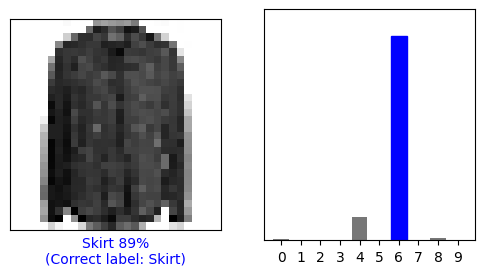

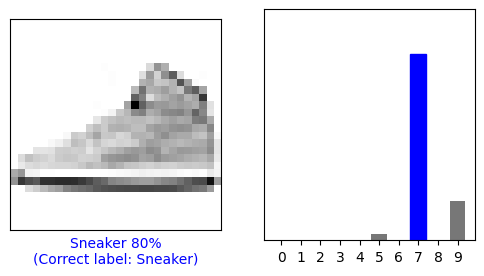

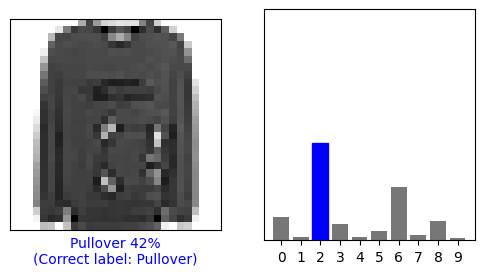

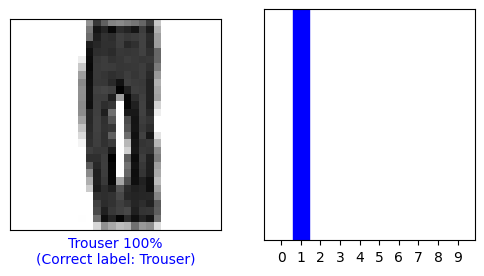

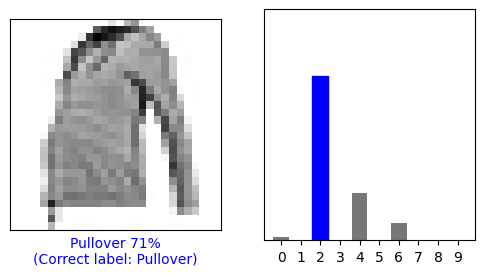

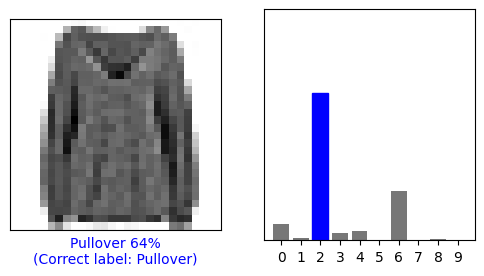

In [13]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()